In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import config
from utils.model import GAN
from utils.callbacks import GANMonitor

In [2]:
(train_images, _), _ = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28*28)) / 127.5 - 1

In [3]:
LATENT_DIM = config.LATENT_DIM
MODEL_NAME = config.MODEL_NAME
gan = GAN(LATENT_DIM, name=MODEL_NAME)

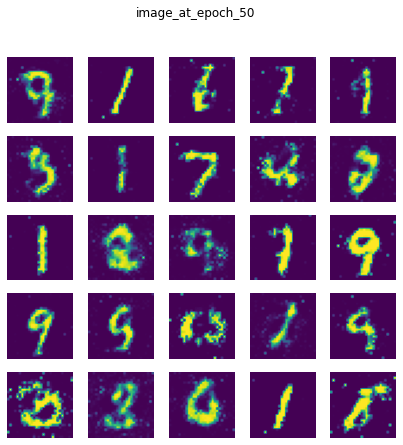

469/469 [==============================] - 21s 46ms/step - discriminator_loss: 0.7733 - generator_loss: 1.9460


In [4]:
tf.keras.backend.clear_session()
LEARNING_RATE = config.LEARNING_RATE
gan.compile(tf.keras.optimizers.Adam(LEARNING_RATE), tf.keras.optimizers.Adam(LEARNING_RATE))

monitor_callback = GANMonitor()

EPOCHS = config.EPOCHS
BATCH_SIZE = config.BATCH_SIZE
hist = gan.fit(
    x=train_images,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    callbacks=[monitor_callback]
)
# gan.save_weights('./gan_save/ckpt')
# gan.load_weights('./gan_save/ckpt')

+ 이미지 학습 과정

![img_gif](./img/gan.gif)

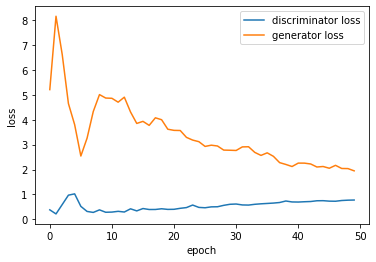

In [17]:
plt.plot(hist.history['discriminator_loss'], label='discriminator loss')
plt.plot(hist.history['generator_loss'], label='generator loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()